# Tugas Praktikum

Persiapan Lingkungan

In [ ]:
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import hdbscan

Load Data Set

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

Normalisasi

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

HDBCAN clustering

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean')
labels = clusterer.fit_predict(X_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Jumlah Cluster Terbentuk

In [ ]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Jumlah cluster terbentuk:", n_clusters)
print("Jumlah noise:", n_noise)

Jumlah cluster terbentuk: 2
Jumlah noise: 2


Visualisasi dengan PCA

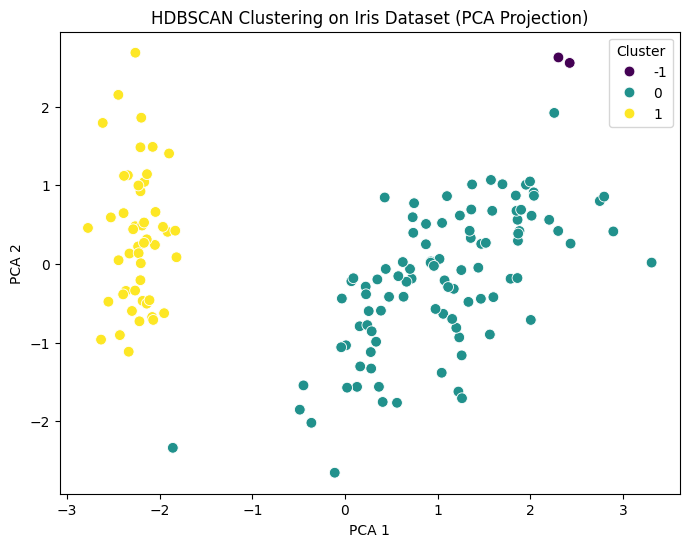

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="viridis", s=60)
plt.title("HDBSCAN Clustering on Iris Dataset (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

Analisis

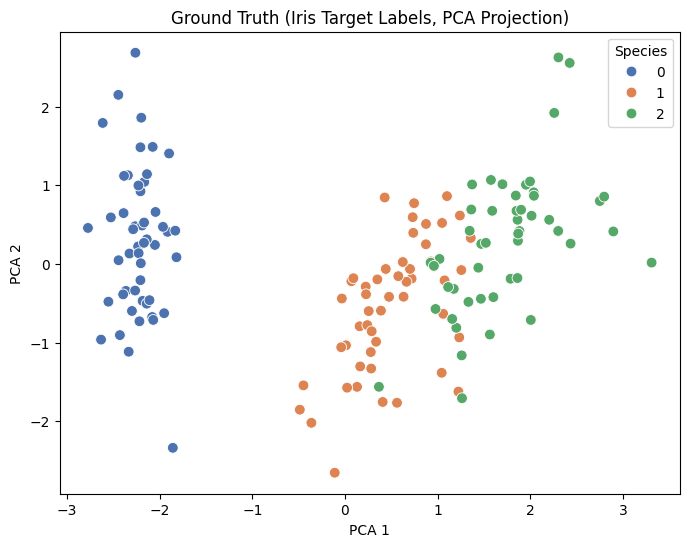

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="deep", s=60)
plt.title("Ground Truth (Iris Target Labels, PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Species")
plt.show()

hasil HDBSCAN tidak 100% sama dengan label asli (karena ini unsupervised), tapi cukup masuk akal:

Cluster jelas untuk Setosa.

Cluster lain berisi campuran Versicolor & Virginica.

Ada sedikit noise yang dianggap outlier.

Hasil clustering tidak sepenuhnya sama dengan label asli: HDBSCAN menemukan 2 cluster utama + noise, sedangkan ground truth memiliki 3 kelas. Namun, pemisahan yang dilakukan HDBSCAN logis karena memang hanya Setosa yang benar-benar berbeda, sementara Versicolor & Virginica sangat mirip sehingga dianggap satu cluster.

